In [1]:
#Install modin
!pip install modin[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 106.

In [2]:
#Import required libraries
import numpy as np
import time
import pandas as pd
import modin.pandas as md
import warnings
warnings.filterwarnings('ignore')

##Read csv file

In [5]:
#Read data.csv file using Pandas
%time p_df = pd.read_csv("Crop_recommendation.csv")

CPU times: user 305 ms, sys: 26.8 ms, total: 332 ms
Wall time: 393 ms


In [6]:
#Read data.csv file using Modin
%time m_df = md.read_csv("Crop_recommendation.csv")

CPU times: user 25.7 ms, sys: 10.2 ms, total: 35.9 ms
Wall time: 262 ms


##Concatenation

In [9]:
import matplotlib.pyplot as plt

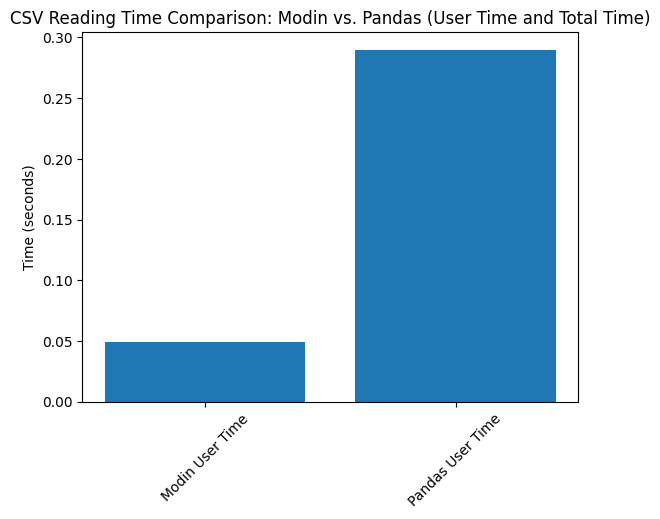

In [14]:
start_user_time = time.process_time()
start_total_time = time.time()
m_df = md.read_csv("Crop_recommendation.csv")
modin_user_time = time.process_time() - start_user_time


# Measure the user and total time to read data.csv file using Pandas
start_user_time = time.process_time()
start_total_time = time.time()
p_df = pd.read_csv("Crop_recommendation.csv")
pandas_user_time = time.process_time() - start_user_time


# Create bar charts to compare user time and total time for Modin and Pandas
labels = ['Modin User Time', 'Pandas User Time']
times = [modin_user_time,  pandas_user_time]

plt.bar(labels, times)
plt.ylabel('Time (seconds)')
plt.title('CSV Reading Time Comparison: Modin vs. Pandas (User Time and Total Time)')
plt.xticks(rotation=45)
plt.show()
#This code will measure and compare both user time and total time for reading the CSV file using Modin and Pandas, and display the results as a bar chart.







In [17]:
#Concatenate the DataFrame with itself using Pandas
%time pd.concat([p_df, p_df], axis=0)

CPU times: user 9.1 ms, sys: 3.76 ms, total: 12.9 ms
Wall time: 13.9 ms


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
228795,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
228796,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
228797,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
228798,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [18]:
#Concatenate the DataFrame with itself using Modin
%time md.concat([m_df, m_df], axis=0)

CPU times: user 4.25 ms, sys: 3.82 ms, total: 8.07 ms
Wall time: 12.5 ms


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
228795,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
228796,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
228797,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
228798,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


##applymap() method

In [ ]:
#Element-wise multiplication of each element by 2 using Pandas
%time p_df.applymap(lambda i:i*2)

CPU times: user 390 ms, sys: 42.3 ms, total: 432 ms
Wall time: 463 ms


,N,P,K,temperature,humidity,ph,rainfall,label
0,180,84,86,41.759487,164.005488,13.005971,405.871072,ricerice
1,170,116,82,43.540923,160.639288,14.076193,453.311075,ricerice
2,120,110,88,46.008918,164.641526,15.680414,527.928495,ricerice
3,148,70,80,52.982193,160.316725,13.960802,485.728068,ricerice
4,156,84,84,40.260350,163.209746,15.256946,525.434681,ricerice
...,...,...,...,...,...,...,...,...
111508,44,288,392,43.823826,183.374961,12.998454,234.152255,appleapple
111509,2,248,398,47.421183,186.547848,11.316948,225.335318,appleapple
111510,60,244,394,42.755693,185.440875,11.146483,212.283403,appleapple
111511,58,242,392,45.697057,188.642604,12.158994,247.195569,appleapple


In [ ]:
#Element-wise multiplication of each element by 2 using Pandas
%time m_df.applymap(lambda i:i*2)

CPU times: user 3.63 ms, sys: 433 µs, total: 4.07 ms
Wall time: 4.31 ms


,N,P,K,temperature,humidity,ph,rainfall,label
0,180,84,86,41.759487,164.005488,13.005971,405.871072,ricerice
1,170,116,82,43.540923,160.639288,14.076193,453.311075,ricerice
2,120,110,88,46.008918,164.641526,15.680414,527.928495,ricerice
3,148,70,80,52.982193,160.316725,13.960802,485.728068,ricerice
4,156,84,84,40.260350,163.209746,15.256946,525.434681,ricerice
...,...,...,...,...,...,...,...,...
111508,44,288,392,43.823826,183.374961,12.998454,234.152255,appleapple
111509,2,248,398,47.421183,186.547848,11.316948,225.335318,appleapple
111510,60,244,394,42.755693,185.440875,11.146483,212.283403,appleapple
111511,58,242,392,45.697057,188.642604,12.158994,247.195569,appleapple


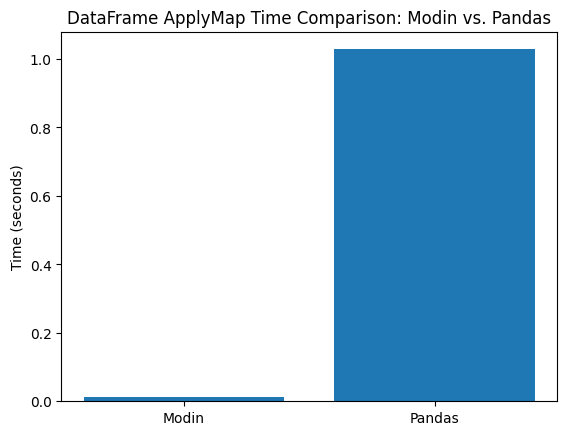

In [21]:
start_time = time.time()
p_result_df = p_df.applymap(lambda i: i * 2)
pandas_apply_time = time.time() - start_time

# Assuming m_df contains your Modin DataFrame
# Measure the time to apply the lambda function using Modin
start_time = time.time()
m_result_df = m_df.applymap(lambda i: i * 2)
modin_apply_time = time.time() - start_time

# Create a bar chart to compare the execution times
labels = ['Modin', 'Pandas']
times = [modin_apply_time, pandas_apply_time]

plt.bar(labels, times)
plt.ylabel('Time (seconds)')
plt.title('DataFrame ApplyMap Time Comparison: Modin vs. Pandas')
plt.show()